In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import warnings
import pickle
import numpy as np
import seaborn as sns
warnings.filterwarnings("ignore")


plt.rcParams["figure.figsize"] = (10, 5)

## Loading The Data

In [2]:
reward_changed = pickle.load(open("rewards_changed",'rb'))
reward_default = pickle.load(open("rewards_default",'rb'))
seeds = ['seed 1', 'seed 2', 'seed 3']

## Default Rewards Agents

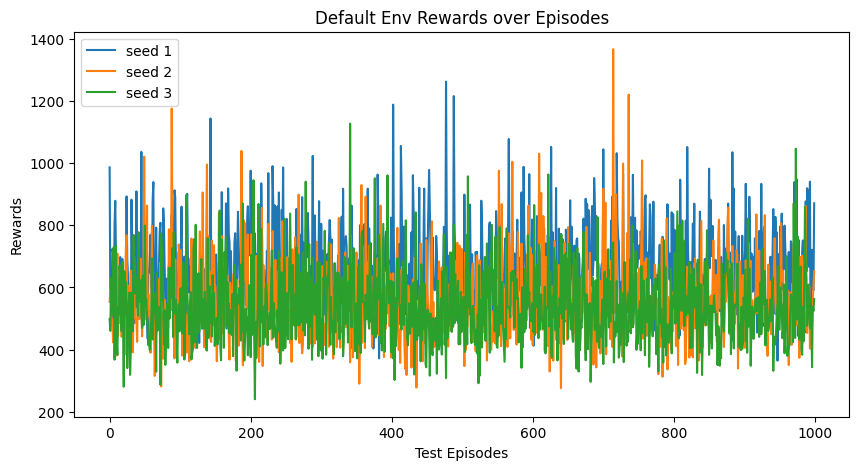

In [3]:
plt.plot(reward_default[0], label="Changed 1")
plt.plot(reward_default[1], label="Changed 2")
plt.plot(reward_default[2], label="Changed 3")
plt.xlabel('Test Episodes')
plt.ylabel('Rewards')
plt.title('Default Env Rewards over Episodes')
plt.legend(seeds, loc = 'upper left')
plt.show()

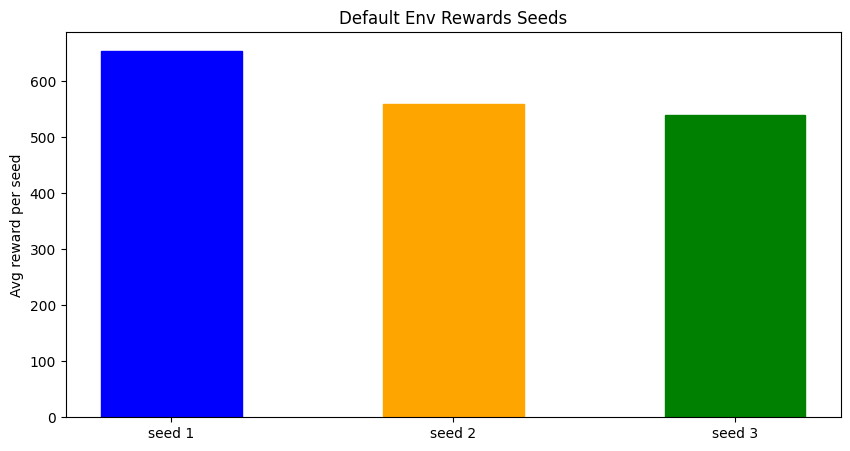

In [4]:
means_default = []
seeds = ['seed 1', 'seed 2', 'seed 3']
for i in range(len(reward_default)):
    means_default.append(np.mean(reward_default[i]))
bars = plt.bar(x = seeds, height=means_default, align='center', width= 0.5)
plt.ylabel('Avg reward per seed')
plt.title('Default Env Rewards Seeds')
bars[0].set_color('blue')
bars[1].set_color('orange')
bars[2].set_color('green')

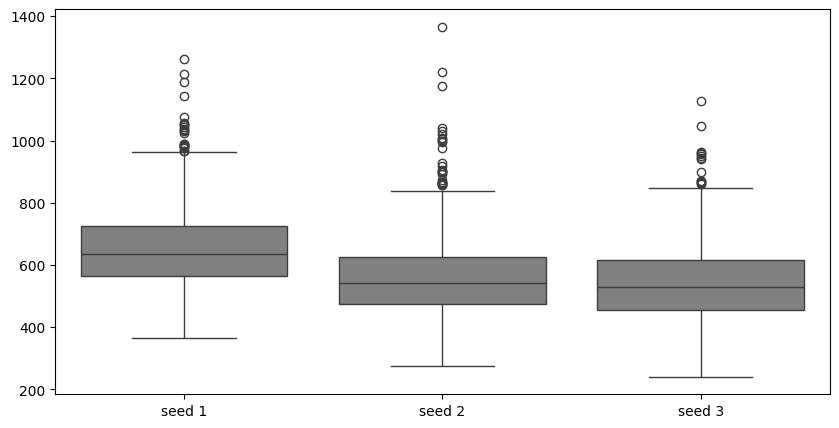

In [5]:
rewards_dict = {}
for i in range(3):
    rewards_dict['seed '+str(i+1)] = reward_default[i]
    
ax = sns.boxplot(data= rewards_dict, color='gray')
plt.show()

## Changed Rewards Agents

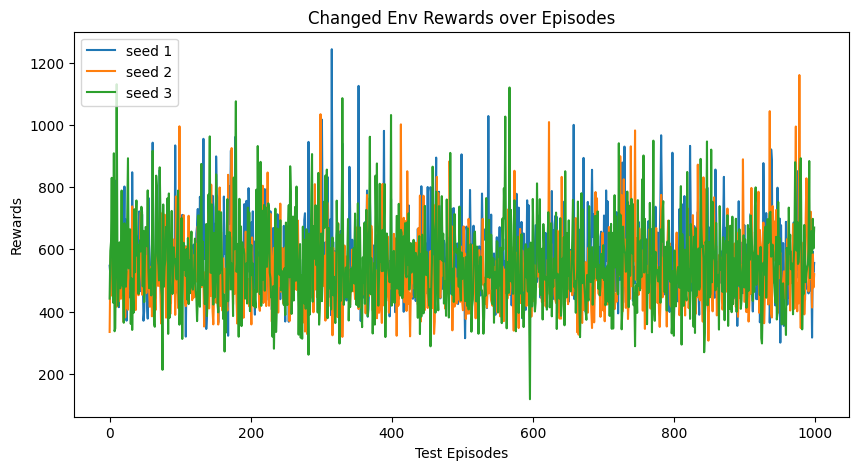

In [6]:
plt.plot(reward_changed[0], label="Changed 1")
plt.plot(reward_changed[1], label="Changed 2")
plt.plot(reward_changed[2], label="Changed 3")
plt.xlabel('Test Episodes')
plt.ylabel('Rewards')
plt.title('Changed Env Rewards over Episodes')
plt.legend(seeds, loc = 'upper left')
plt.show()

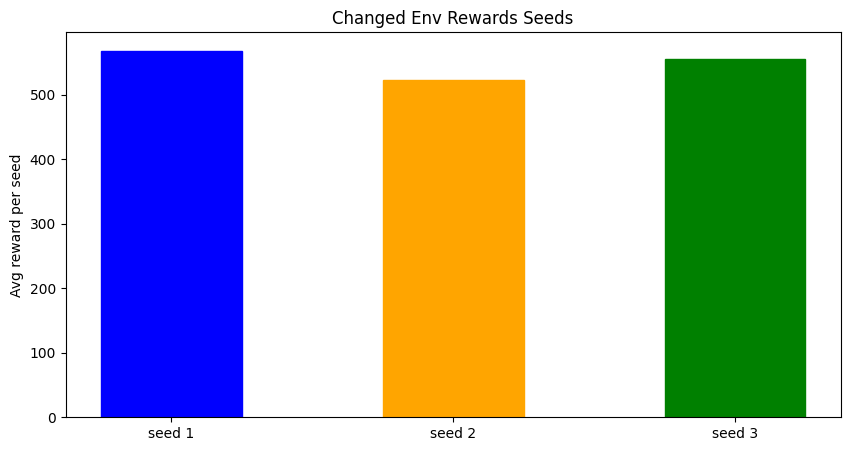

In [7]:
means_changed = []
seeds = ['seed 1', 'seed 2', 'seed 3']
for i in range(len(reward_changed)):
    means_changed.append(np.mean(reward_changed[i]))
bars = plt.bar(x = seeds, height=means_changed, align='center', width= 0.5)
plt.ylabel('Avg reward per seed')
plt.title('Changed Env Rewards Seeds')
bars[0].set_color('blue')
bars[1].set_color('orange')
bars[2].set_color('green')

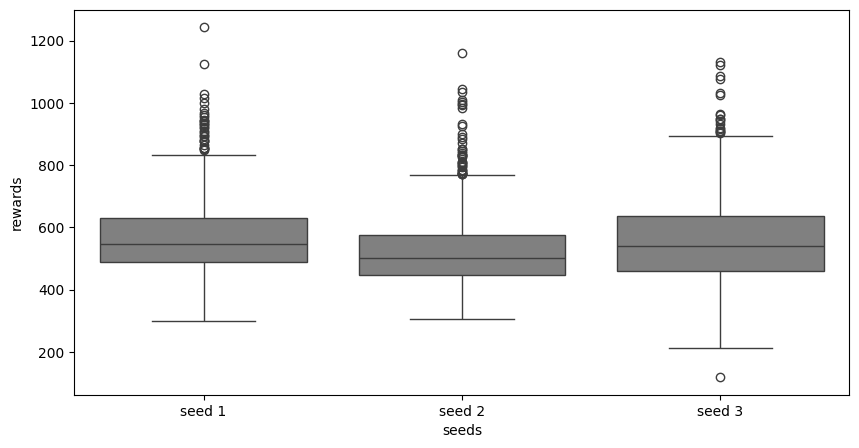

In [8]:
rewards_dict = {}
for i in range(3):
    rewards_dict['seed '+str(i+1)] = reward_changed[i]
    
ax = sns.boxplot(data= rewards_dict, color='grey')
plt.xlabel('seeds')
plt.ylabel('rewards')
plt.show()

## Result Comparison

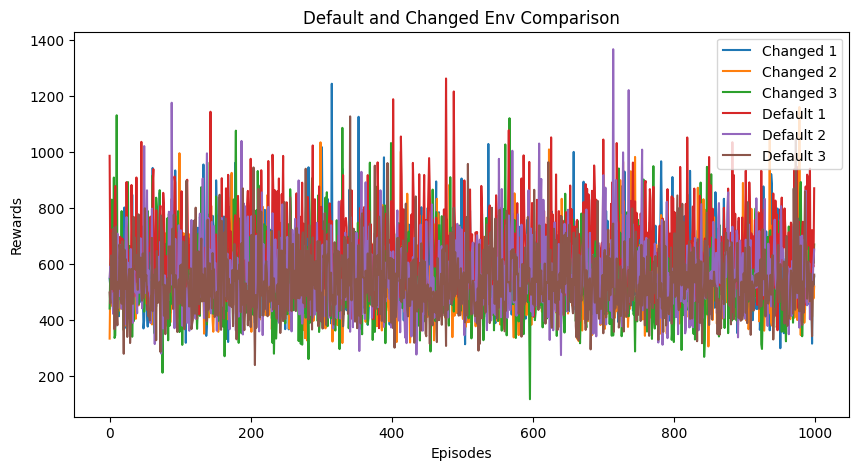

In [9]:
reward_changed = pickle.load(open("rewards_changed",'rb'))
reward_default = pickle.load(open("rewards_default",'rb'))

plt.plot(reward_changed[0], label="Changed 1")
plt.plot(reward_changed[1], label="Changed 2")
plt.plot(reward_changed[2], label="Changed 3")
plt.plot(reward_default[0], label="Default 1")
plt.plot(reward_default[1], label="Default 2")
plt.plot(reward_default[2], label="Default 3")
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Default and Changed Env Comparison')
plt.legend()
plt.show()

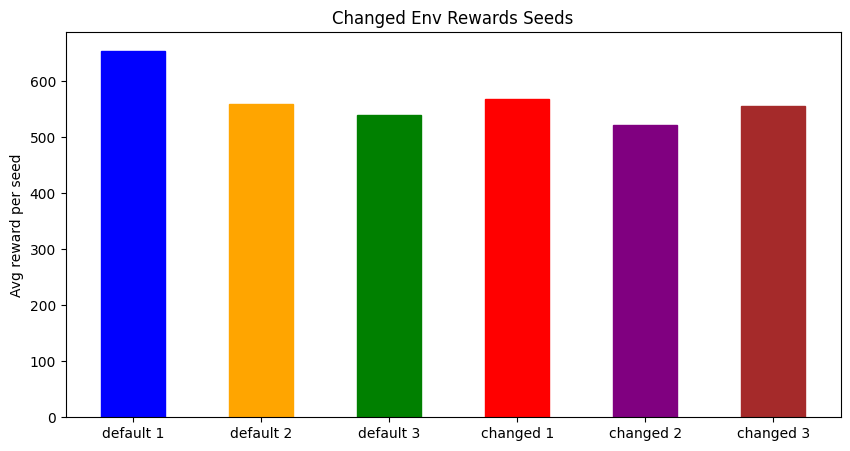

In [10]:
all_means = []
seeds = ['default 1', 'default 2', 'default 3', 'changed 1', 'changed 2', 'changed 3']
for i in range(6):
    if i<=2:
        all_means.append(np.mean(reward_default[i]))
    else:
        all_means.append(np.mean(reward_changed[i-3]))

bars = plt.bar(x = seeds, height=all_means, align='center', width= 0.5)
plt.ylabel('Avg reward per seed')
plt.title('Changed Env Rewards Seeds')
bars[0].set_color('blue')
bars[1].set_color('orange')
bars[2].set_color('green')
bars[3].set_color('red')
bars[4].set_color('purple')
bars[5].set_color('brown')

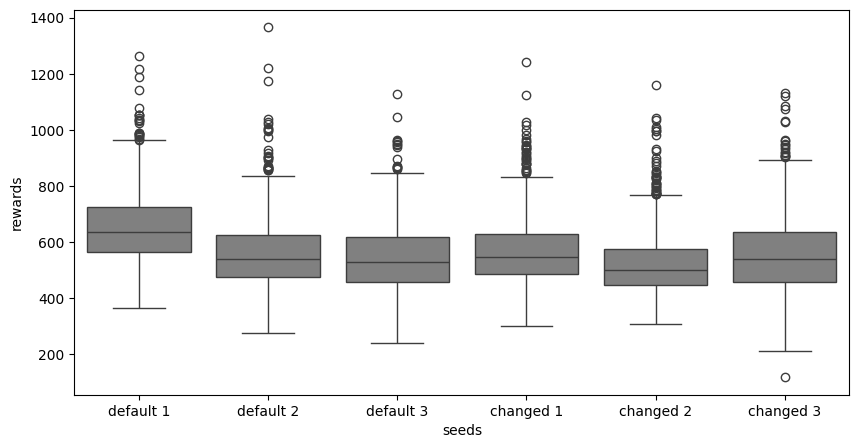

In [11]:
rewards_dict = {}
for i in range(6):
    if i <=2:
        rewards_dict['default '+str(i+1)] = reward_default[i]
    else:
        rewards_dict['changed '+str(i-2)] = reward_changed[i-3]
    
ax = sns.boxplot(data= rewards_dict, color='grey')
plt.xlabel('seeds')
plt.ylabel('rewards')
plt.show()

### T-Test

In [12]:
import scipy.stats as stats

In [13]:
flattened_default_rewards = np.array(reward_default).flatten('F')
flattened_changed_rewards = np.array(reward_changed).flatten('F')

In [14]:
ttest_result = stats.ttest_ind(flattened_default_rewards, flattened_changed_rewards, equal_var=False)

In [15]:
ttest_result

TtestResult(statistic=10.696914047665128, pvalue=1.82772614587155e-26, df=5955.495487925635)